In [1]:
from utils import *
# from MySolution_13 import MyClassifier, MyClustering, MyLabelSelection, MyFeatureSelection

%load_ext autoreload
%autoreload 2

Synthetic data shape:  (1000, 2) (1000,)


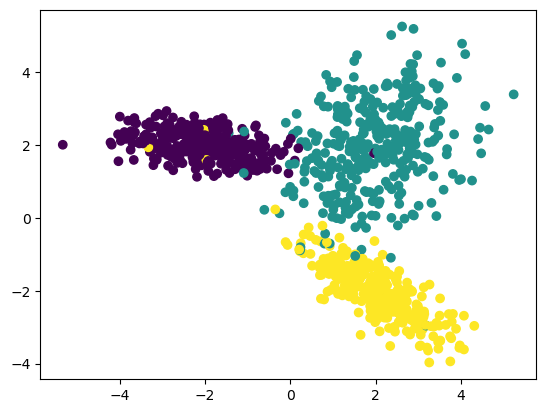

In [2]:
# Get datasets
syn_data = prepare_synthetic_data()
print("Synthetic data shape: ", syn_data['trainX'].shape, syn_data['trainY'].shape)

plt.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=syn_data['trainY'])

MNIST data shape:  (1000, 784) (1000,)


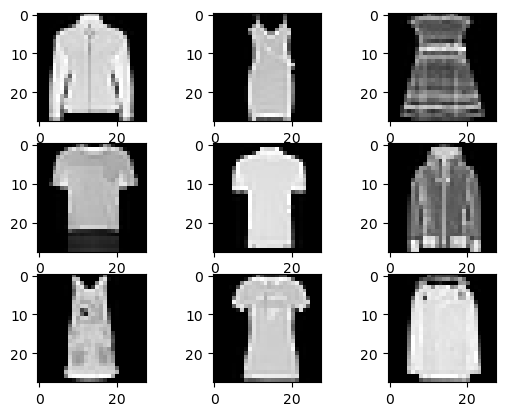

In [3]:
mnist_data = prepare_mnist_data()
print("MNIST data shape: ", mnist_data['trainX'].shape, mnist_data['trainY'].shape)

for i in range(9):	
    plt.subplot(330 + 1 + i)
    plt.imshow(mnist_data['trainX'][i].reshape(28,28), cmap='gray')
plt.show()

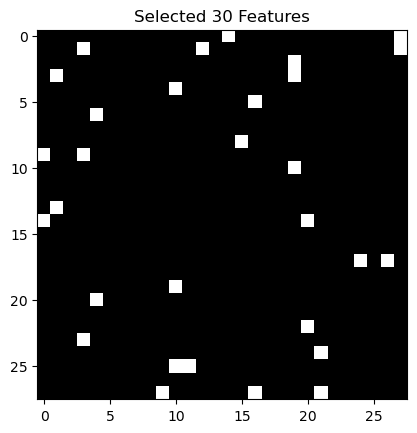

In [4]:
import numpy as np

data = prepare_mnist_data()

# randomly choose 30 features
np.random.seed(0)
selected_features = np.random.choice(data['trainX'].shape[1], 30, replace=False)
data['trainX'] = data['trainX'][:, selected_features]
data['testX'] = data['testX'][:, selected_features]

visualize_features(selected_features)

In [14]:
import Task1

Optimal value:652.5971262922042
[0. 0. 0. ... 1. 1. 1.]


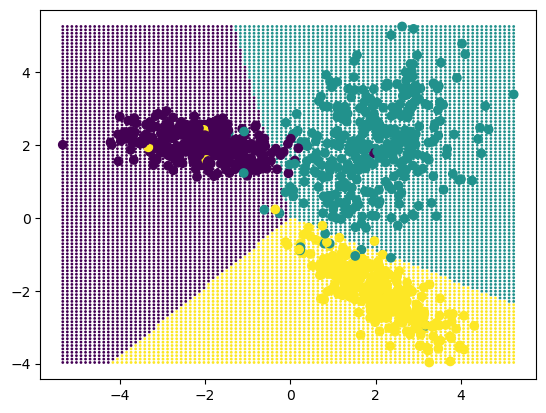

In [16]:
# Testing for Task 1
xmin, xmax = np.min(syn_data['trainX'][:, 0]), np.max(syn_data['trainX'][:, 0])
ymin, ymax = np.min(syn_data['trainX'][:, 1]), np.max(syn_data['trainX'][:, 1])

x_linspace = np.linspace(xmin, xmax, 100)
y_linspace = np.linspace(ymin, ymax, 100)
x, y = np.meshgrid(x_linspace, y_linspace)
cartesian = np.stack((x.ravel(), y.ravel()), axis=1)
syn_class = Task1.MyClassifier(3)
syn_class.train(syn_data['trainX'], syn_data['trainY'])

plt.scatter(cartesian[:, 0], cartesian[:, 1], c=syn_class.predict(cartesian), s=1)
print(syn_class.predict(cartesian))
plt.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=syn_data['trainY'])
# plt.scatter(syn_data['testX'][:, 0], syn_data['testX'][:, 1], c=syn_data['testY'])

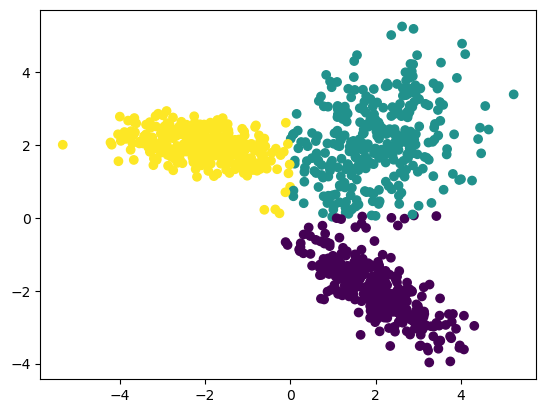

In [7]:
# Testing for Task 2
syn_clustering = Task1.MyClustering(3)
syn_clustering.train(syn_data['trainX'])
plt.scatter(syn_data['trainX'][:, 0], syn_data['trainX'][:, 1], c=syn_clustering.labels)

In [8]:
# Task 1
syn_classifier = Task1.MyClassifier(3)
syn_classifier.train(syn_data['trainX'], syn_data['trainY'])
print(syn_classifier.W.value)
mnist_classifier = Task1.MyClassifier(3)
mnist_classifier.train(mnist_data['trainX'], mnist_data['trainY'])
result1 = {'synthetic_test_accuracy':syn_classifier.evaluate(syn_data['testX'], syn_data['testY']),
           'mnist_test_accuracy':mnist_classifier.evaluate(mnist_data['testX'], mnist_data['testY'])}

[1. 2. 1. 0. 1. 0. 0. 2. 2. 1.]
[1 2 1 0 1 0 0 2 2 1]
[0. 1. 2.]
[[-0.17677266  0.1557931   0.02305841]
 [ 0.02749095  0.11147216 -0.182523  ]]
[[0.12466997]
 [0.12470087]
 [0.12465851]]
Optimal value:652.5971262922042
[[-0.17677266  0.1557931   0.02305841]
 [ 0.02749095  0.11147216 -0.182523  ]]
[4. 3. 3. 0. 0. 4. 3. 0. 4. 4.]
[2 1 1 0 0 2 1 0 2 2]
[0. 3. 4.]
[[-6.23086859e+00 -1.50240497e+00  9.57059177e+00]
 [-2.02258551e+01  4.37629644e+00  1.95741689e+01]
 [ 1.30624289e-02 -3.09206391e-02  2.35549884e-02]
 ...
 [-2.08425513e-03  1.18849541e-02 -4.77948033e-03]
 [ 6.79279220e+00  5.55056476e+00 -1.55894543e+01]
 [-9.46453485e+00 -2.17820031e+00  1.44137104e+01]]
[[0.09427153]
 [0.09566124]
 [0.09371404]]
Optimal value:164.37696534239723
predY.shape (500, 3)
[[ 0.41676345  0.13187414 -0.26234983]
 [-0.05729053  0.66966317 -0.35874292]
 [-0.73466099  0.41419029  0.85367287]
 ...
 [ 0.72509485 -0.15097321 -0.28792033]
 [-0.12826924  0.62022132 -0.20180349]
 [-0.30766652  0.56499158  0

/home/big/miniforge3/envs/c147/lib/python3.9/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


In [9]:
# Task 2
result2 = {
    'synthetic': {
        'K': [3, 5, 10],
        'clustering_nmi': [],
        'classification_accuracy': [],
    },
    'mnist': {
        'K': [3, 10, 32],
        'clustering_nmi': [],
        'classification_accuracy': []
    },
}

for k1, k2 in zip(result2['synthetic']['K'], result2['mnist']['K']):
    print(f"synthetic dataset with K = {k1}")
    syn_clustering = Task1.MyClustering(k1)
    syn_clustering.train(syn_data['trainX'])
    syn_nmi = syn_clustering.evaluate_clustering(syn_data['trainY'].astype(np.int32))
    syn_acc = syn_clustering.evaluate_classification(syn_data['trainY'].astype(np.int32), syn_data['testX'].astype(np.int32), syn_data['testY'].astype(np.int32))
    result2['synthetic']['clustering_nmi'].append(syn_nmi)
    result2['synthetic']['classification_accuracy'].append(syn_acc)

    print(f"mnist dataset with K = {k2}")
    mnist_clustering = Task1.MyClustering(k2)
    mnist_clustering.train(mnist_data['trainX'])
    mnist_nmi = mnist_clustering.evaluate_clustering(mnist_data['trainY'].astype(np.int32))
    mnist_acc = mnist_clustering.evaluate_classification(mnist_data['trainY'].astype(np.int32), mnist_data['testX'].astype(np.int32), mnist_data['testY'].astype(np.int32))
    result2['mnist']['clustering_nmi'].append(mnist_nmi)
    result2['mnist']['classification_accuracy'].append(mnist_acc)

synthetic dataset with K = 3
reference shape:{0: 0, 1: 1, 2: 2}
reference shape:{0: 0, 1: 1, 2: 2}
mnist dataset with K = 3
reference shape:{0: 3, 1: 0, 2: 4}
reference shape:{0: 3, 1: 0, 2: 4}
synthetic dataset with K = 5
reference shape:{0: 2, 1: 2, 2: 1, 3: 1, 4: 0}
reference shape:{0: 2, 1: 2, 2: 1, 3: 1, 4: 0}
mnist dataset with K = 10
reference shape:{0: 3, 1: 3, 2: 4, 3: 0, 4: 0, 5: 4, 6: 3, 7: 0, 8: 3, 9: 0}
reference shape:{0: 3, 1: 3, 2: 4, 3: 0, 4: 0, 5: 4, 6: 3, 7: 0, 8: 3, 9: 0}
synthetic dataset with K = 10
reference shape:{0: 0, 1: 1, 2: 2, 3: 2, 4: 0, 5: 1, 6: 2, 7: 1, 8: 2, 9: 1}
reference shape:{0: 0, 1: 1, 2: 2, 3: 2, 4: 0, 5: 1, 6: 2, 7: 1, 8: 2, 9: 1}
mnist dataset with K = 32
reference shape:{0: 0, 1: 3, 2: 0, 3: 3, 4: 3, 5: 0, 6: 4, 7: 0, 8: 4, 9: 3, 10: 3, 11: 0, 12: 4, 13: 0, 14: 4, 15: 4, 16: 4, 17: 3, 18: 0, 19: 4, 20: 0, 21: 3, 22: 0, 23: 0, 24: 4, 25: 3, 26: 0, 27: 4, 28: 4, 29: 3, 30: 4, 31: 0}
reference shape:{0: 0, 1: 3, 2: 0, 3: 3, 4: 3, 5: 0, 6: 4, 7: 

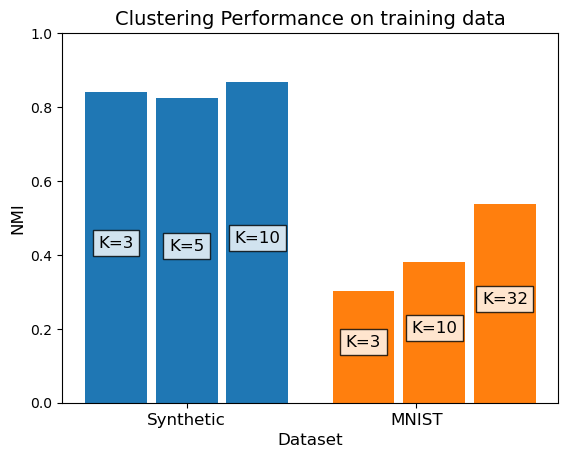

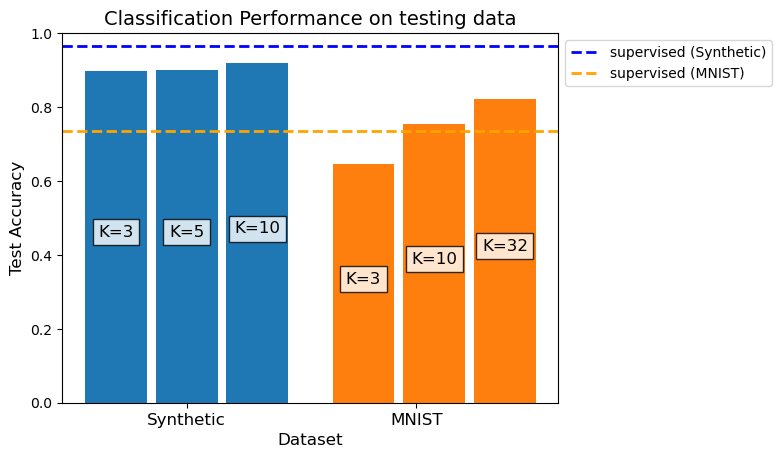

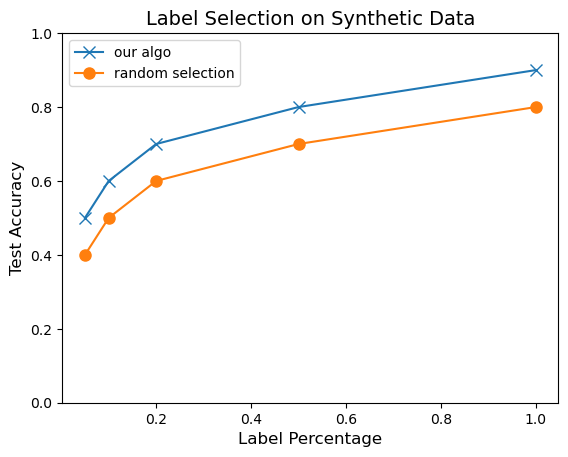

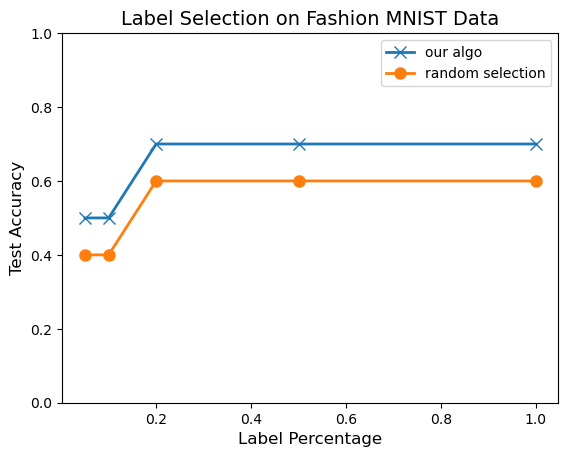

In [10]:
## TODO: Implement your solution and store the results in the following dictionaries
## Please note that the below values are given as an example to show the format, 
## you need to replace them with your values :)


# Task 3
# only include the plots for the option of task 3 you chosen in the report                    
result3_1 = {'synthetic': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.6,0.7,0.8,0.9], 'test_accuracy(random)':[0.4,0.5,0.6,0.7,0.8]},
            'mnist': {'label_percentage':[0.05,0.1,0.2,0.5,1], 'test_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'test_accuracy(random)':[0.4,0.4,0.6,0.6,0.6]}}

result3_2 = {'feature_number':[5, 20, 80, 320, 784], 'classifier_accuracy(our algo)':[0.5,0.5,0.7,0.7,0.7], 'classifier_accuracy(random)':[0.4,0.4,0.6,0.6,0.6], 
                                                'clustering_accuracy(our algo)':[0.35,0.35,0.45,0.55,0.6], 'clustering_accuracy(random)':[0.3,0.3,0.4,0.5,0.6], 
                                                'nmi(our algo)':[0.35,0.4,0.45,0.5,0.5], 'nmi(random)':[0.3,0.35,0.4,0.5,0.5]}


plot_result(result1 = result1, result2 = result2, result3_1 = result3_1)

# Alternatively
# plot_result(result1 = result1, result2 = result2, result3_2 = result3_2)